In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions import *
import winsound

In [2]:
u= []
L = 10 # comprimento da barra
Δx = 0.01
num_pontos = int(np.ceil(L/Δx))
Δt = 0.01
tempo_final = 100
k = 0.835
λ = k * Δt/Δx**2
condição_inicial = 0.
contorno = np.array([100.,50.])
variavel = np.ones(num_pontos) * condição_inicial
xx = np.arange(0,L,Δx)
tt = np.arange(0,tempo_final,Δt)
matriz_coeficiente = CrankNicolson.gerarMatrizCoeficientes(num_pontos,λ)
matriz_ampliada = CrankNicolson.gerarMatrizAmpliada(num_pontos,contorno,variavel,λ)

In [3]:
matriz_coeficiente

array([[169. , -83.5,   0. , ...,   0. ,   0. ,   0. ],
       [-83.5, 169. , -83.5, ...,   0. ,   0. ,   0. ],
       [  0. , -83.5, 169. , ...,   0. ,   0. ,   0. ],
       ...,
       [  0. ,   0. ,   0. , ..., 169. , -83.5,   0. ],
       [  0. ,   0. ,   0. , ..., -83.5, 169. , -83.5],
       [  0. ,   0. ,   0. , ...,   0. , -83.5, 169. ]])

In [4]:
for _ in np.arange(0,tempo_final,Δt):
    variavel = np.linalg.solve(matriz_coeficiente,matriz_ampliada)
    u.append(variavel)
    matriz_ampliada = CrankNicolson.gerarMatrizAmpliada(num_pontos,contorno,variavel,λ)

In [5]:
u = np.array(u)

Text(0.5, 1.0, 'Solução numérica no ponto 8.0')

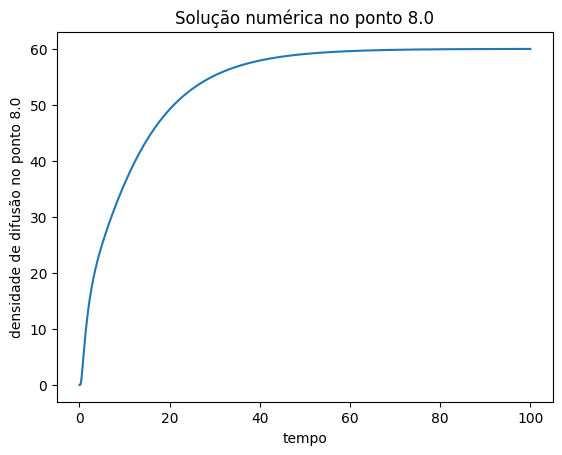

In [44]:
a = 800
plt.plot(tt,u[:,a])
plt.xlabel('tempo')
plt.ylabel(f'densidade de difusão no ponto {xx[a]}')
plt.title(f'Solução numérica no ponto {xx[a]}')

In [45]:
def f(x,t):
    global k
    somatorio = 0
    for n in range(1,1000):
        # print(somatorio)
        somatorio += 100*((-1)**n - 2)/(n * np.pi) * np.sin(n*np.pi*x/10)*np.exp(-k*(n* np.pi/10)**2*t)
    return 100 - 5*x + somatorio

In [46]:
xx[a]

8.0

Text(0.5, 1.0, 'Solução analitica u(8.0,t)')

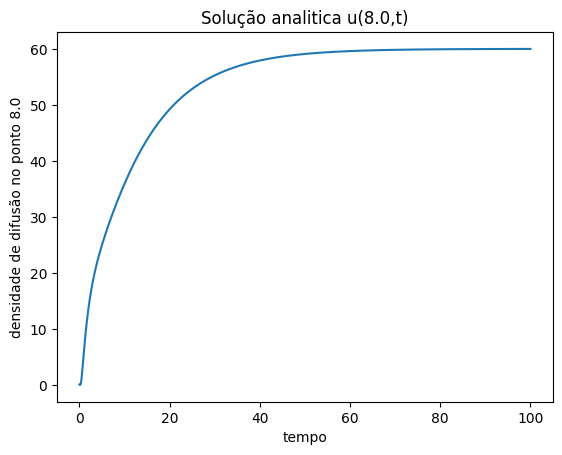

In [47]:
plt.plot(tt,f(xx[a],tt))
plt.xlabel('tempo')
plt.ylabel(f'densidade de difusão no ponto {xx[a]}')
plt.title(f'Solução analitica u({xx[a]},t)')

Text(0, 0.5, 'densidade de difusão no ponto 8.0')

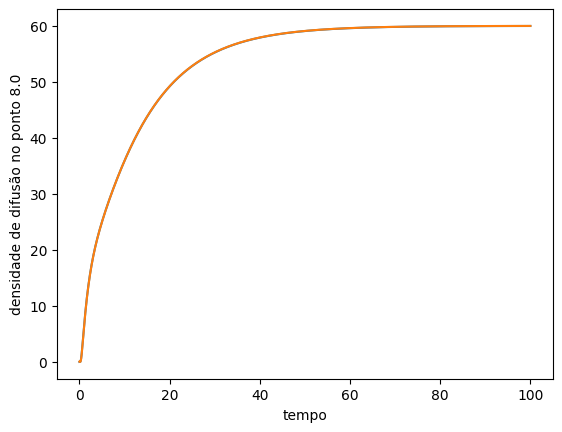

In [48]:
plt.plot(tt,u[:,a])
plt.plot(tt,f(xx[a],tt))
plt.xlabel('tempo')
plt.ylabel(f'densidade de difusão no ponto {xx[a]}')

In [49]:
erro_percentual = (f(xx[a],tt) - u[:,a].flatten())/f(xx[a],tt)

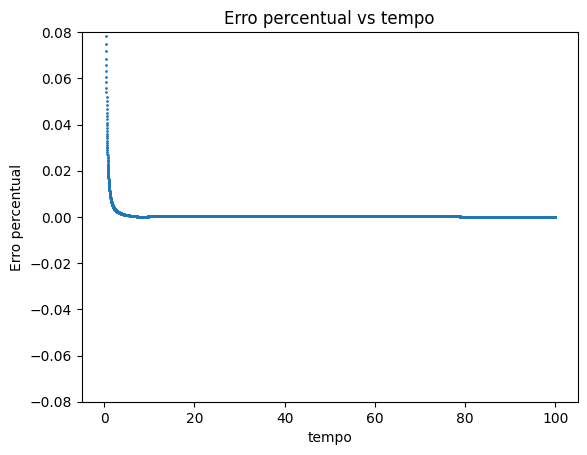

In [50]:
escala = .08
plt.scatter(tt,np.abs(erro_percentual),s=1)
plt.title("Erro percentual vs tempo")
plt.ylabel("Erro percentual")
plt.ylim(-escala,escala)
plt.xlabel("tempo")
plt.show()